# **Redes neuronales convolucionales**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizando las imágenes para que los valores estén en el rango [0, 1].
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertir los labels a one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
#model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(10, activation='softmax'))


In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
938/938 [==============================] - 9s 6ms/step - loss: 0.1842 - accuracy: 0.9437 - val_loss: 0.0582 - val_accuracy: 0.9808
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0406 - val_accuracy: 0.9875
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0308 - val_accuracy: 0.9899
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0301 - val_accuracy: 0.9921
Epoch 

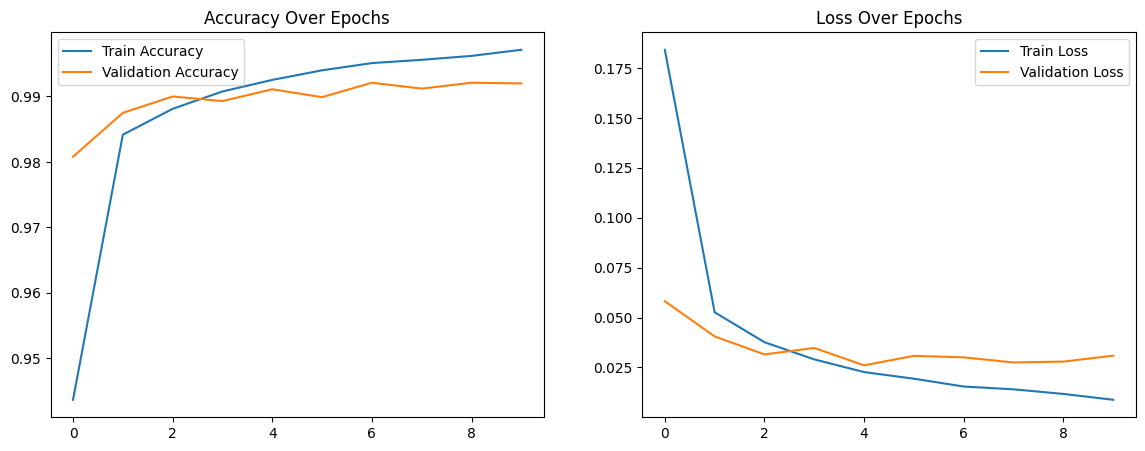

In [42]:
plt.figure(figsize=(14, 5))

# Gráfico para la precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Gráfico para la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


In [43]:
predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
true_labels = np.argmax(test_labels, axis=1)


313/313 [==============================] - 1s 2ms/step


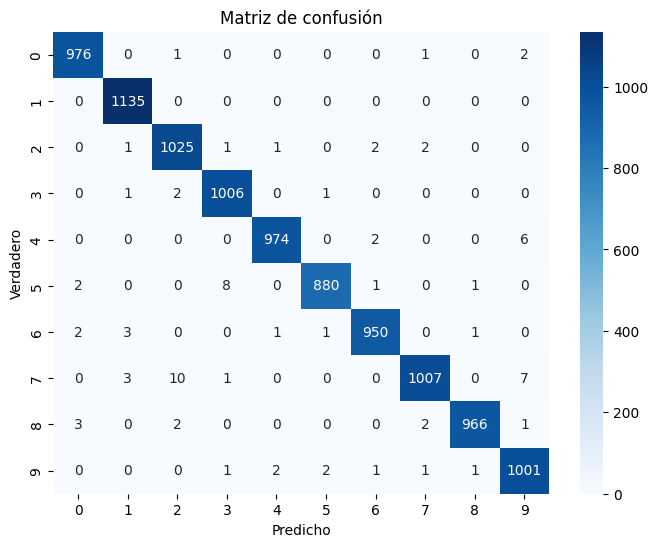

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()


In [45]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.9929    0.9959    0.9944       980
           1     0.9930    1.0000    0.9965      1135
           2     0.9856    0.9932    0.9894      1032
           3     0.9892    0.9960    0.9926      1010
           4     0.9959    0.9919    0.9939       982
           5     0.9955    0.9865    0.9910       892
           6     0.9937    0.9916    0.9927       958
           7     0.9941    0.9796    0.9868      1028
           8     0.9969    0.9918    0.9943       974
           9     0.9843    0.9921    0.9882      1009

    accuracy                         0.9920     10000
   macro avg     0.9921    0.9919    0.9920     10000
weighted avg     0.9920    0.9920    0.9920     10000



In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Para almacenar las métricas
metrics = {
    'Digit': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for i in range(10):
    # Convertir las etiquetas a binarias: 'i' vs 'no i'
    true_binary = np.where(true_labels == i, 1, 0)
    predicted_binary = np.where(predicted_labels == i, 1, 0)

    # Calcular métricas
    precision = precision_score(true_binary, predicted_binary)
    recall = recall_score(true_binary, predicted_binary)
    f1 = f1_score(true_binary, predicted_binary)

    # Almacenar métricas
    metrics['Digit'].append(i)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)

# Mostrar las métricas
import pandas as pd

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


   Digit  Precision    Recall  F1-Score
0      0   0.992879  0.995918  0.994396
1      1   0.993001  1.000000  0.996488
2      2   0.985577  0.993217  0.989382
3      3   0.989184  0.996040  0.992600
4      4   0.995910  0.991853  0.993878
5      5   0.995475  0.986547  0.990991
6      6   0.993724  0.991649  0.992685
7      7   0.994077  0.979572  0.986771
8      8   0.996904  0.991786  0.994339
9      9   0.984267  0.992071  0.988154


In [47]:
# Usamos la matriz de confusión 'cm' que ya hemos calculado antes
for i in range(10):
    # Para cada dígito, obtenemos los valores fuera de la diagonal
    incorrect_predictions = np.delete(cm[i, :], i)
    other_digits = list(range(0, i)) + list(range(i+1, 10))

    # Dígitos con los que "choca" el dígito actual (consideramos solo si hubo alguna confusión)
    mistaken_with = [str(other_digits[j]) + " (" + str(incorrect_predictions[j]) + " vez/veces)" for j in range(9) if incorrect_predictions[j] > 0]

    print(f"El dígito {i} fue confundido con:")
    print(", ".join(mistaken_with))


El dígito 0 fue confundido con:
2 (1 vez/veces), 7 (1 vez/veces), 9 (2 vez/veces)
El dígito 1 fue confundido con:

El dígito 2 fue confundido con:
1 (1 vez/veces), 3 (1 vez/veces), 4 (1 vez/veces), 6 (2 vez/veces), 7 (2 vez/veces)
El dígito 3 fue confundido con:
1 (1 vez/veces), 2 (2 vez/veces), 5 (1 vez/veces)
El dígito 4 fue confundido con:
6 (2 vez/veces), 9 (6 vez/veces)
El dígito 5 fue confundido con:
0 (2 vez/veces), 3 (8 vez/veces), 6 (1 vez/veces), 8 (1 vez/veces)
El dígito 6 fue confundido con:
0 (2 vez/veces), 1 (3 vez/veces), 4 (1 vez/veces), 5 (1 vez/veces), 8 (1 vez/veces)
El dígito 7 fue confundido con:
1 (3 vez/veces), 2 (10 vez/veces), 3 (1 vez/veces), 9 (7 vez/veces)
El dígito 8 fue confundido con:
0 (3 vez/veces), 2 (2 vez/veces), 7 (2 vez/veces), 9 (1 vez/veces)
El dígito 9 fue confundido con:
3 (1 vez/veces), 4 (2 vez/veces), 5 (2 vez/veces), 6 (1 vez/veces), 7 (1 vez/veces), 8 (1 vez/veces)
